<a href="https://colab.research.google.com/github/rahmani3101/Machine-Learning-/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Naive Bayes Classifier on Student Study Patterns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

In [3]:
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85],
    'Result': ['Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass']
}

In [4]:
df = pd.DataFrame(data)
df.to_csv("student_nb.csv", index=False)

In [5]:
dataset = pd.read_csv("student_nb.csv")
print("First 5 rows of dataset:\n", dataset.head())

First 5 rows of dataset:
    Hours  Scores Result
0    2.5      21   Fail
1    5.1      47   Pass
2    3.2      27   Fail
3    8.5      75   Pass
4    3.5      30   Fail


## Step 2: Explore and Visualize

In [6]:
dataset['Result'] = dataset['Result'].map({'Pass': 1, 'Fail': 0})

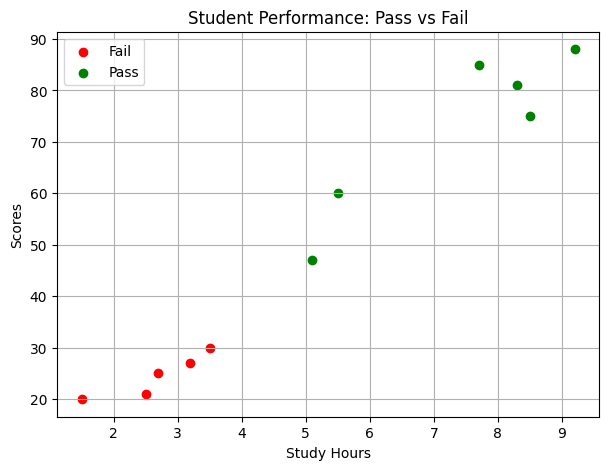

In [7]:
plt.figure(figsize=(7,5))
for label, color in zip([0, 1], ['red', 'green']):
    subset = dataset[dataset['Result'] == label]
    plt.scatter(subset['Hours'], subset['Scores'], color=color, label=('Fail' if label == 0 else 'Pass'))
plt.title('Student Performance: Pass vs Fail')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Split Data into Train and Test Sets

In [8]:
X = dataset[['Hours', 'Scores']]
y = dataset['Result']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4: Train Naive Bayes Classifier (GaussianNB)

In [11]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)


GaussianNB()

## Step 5: Predict Test Set Results

In [12]:
y_pred = nb_classifier.predict(X_test_scaled)
print("\nPredicted Results:", y_pred)
print("Actual Results:", y_test.values)


Predicted Results: [1 1 0 1]
Actual Results: [0 0 0 1]


## Step 6: Evaluate Model Performance

In [13]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [14]:
print(f"\nModel Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


Model Accuracy: 0.50
Confusion Matrix:
 [[1 2]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



## Step 7: Visualize Decision Boundary

In [15]:
X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

/tmp/ipython-input-624550728.py:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X_combined, y_combined.astype(np.integer), clf=nb_classifier, legend=2)


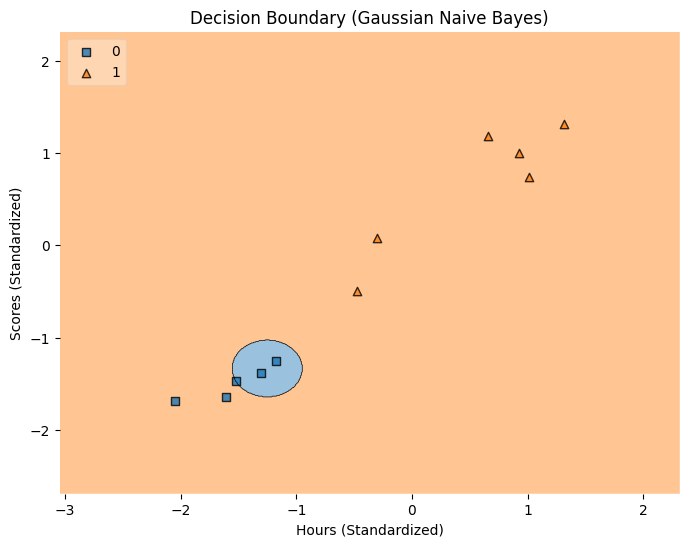

In [16]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_combined, y_combined.astype(np.integer), clf=nb_classifier, legend=2)
plt.title('Decision Boundary (Gaussian Naive Bayes)')
plt.xlabel('Hours (Standardized)')
plt.ylabel('Scores (Standardized)')
plt.show()

## Step 8: Predict for New Student (9.25 hrs, 85 score)

In [17]:
new_data = np.array([[9.25, 85]])
new_data_scaled = scaler.transform(new_data)
prediction = nb_classifier.predict(new_data_scaled)[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
print(f"\nPrediction for student (Hours=9.25, Score=85): {'Pass' if prediction == 1 else 'Fail'}")


Prediction for student (Hours=9.25, Score=85): Pass
